&nbsp;

# 05 - Statistiques Univariées

---

&nbsp;

&nbsp;

## 1. Moyenne 

> #### Comment calculer la moyenne de nos températures à la surface dans le cas de la Manche ?

Tout d'abord, rappelons la formule globale pour le calcul d'une moyenne spatiale sur une sphère :

$$
\bar{T}(t) = \frac{
\sum_{\text{lat, lon}} T(t, \text{lat}, \text{lon}) \cdot \cos(\text{lat})
}{
\sum_{\text{lat, lon}} \cos(\text{lat})
}
$$

Les termes $cos(lat)$ permettent de faire la pondération à cause de la déformation spatiale d'une sphère : un pixel au niveau des pôles aura une pondération plus faible qu'un pixel au niveau de l'équateur. Cette pondération ne prend pas en compte la longitude puisque celle-ci est fixe pour une latitude donnée.

Cependant dans notre cas nous sommes dans une zone géographique réduite (la Manche). Par conséquent la différence de surface représentée par nos pixels est négligeable et nous pouvons donc simplifier la formule :

$$
\bar{T}(t) = \frac{
\sum_{\text{lat, lon}} T(t, \text{lat}, \text{lon})
}{
N_{\text{pixels}}
}
$$

Ainsi nous obtenons un vecteur temporel contenant la moyenne des températures à la surface de la Manche chaque jour.

&nbsp;

> #### Pourquoi utiliser des données désaisonnalisées ?

Sur les données non désaisonnalisées la moyenne sera fortement influencées par le cycle annuel :
- les températures sont plus élevées en été
- les températures sont plus basses en hiver
La moyenne serait alors principalement une moyenne climatologique saisonnière et pas une information sur l'état thermique anormal à la surface de la Manche.
Ainsi en utilisant les données désaisonnalisées on aura une moyenne qui représente le biais thermique moyen par rapport à la climatologie de notre système, une moyenne proche de 0 nous indiquera donc un état globalement neutre. Cependant si la moyenne est trop éloignée de 0 alors on aura un réchauffement ou un refroidissement anormal.

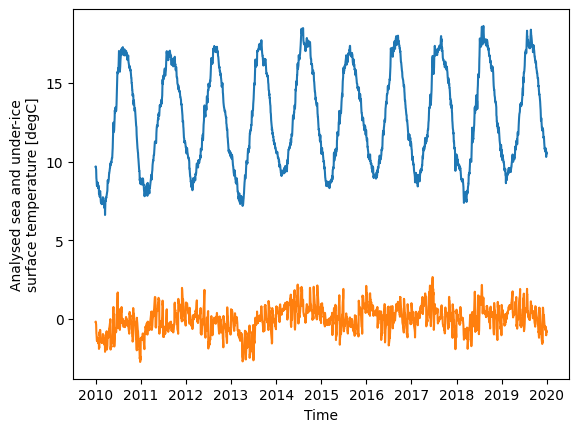

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
dataset = xr.open_dataset("../../data/processed/sstCOPERNICUS20102019Processed.nc")
datasetSeasonallyAdjusted = xr.open_dataset("../../data/processed/sstDeseasonalizedCOPERNICUS20102019.nc")

# Calcul des moyennes
sstMean = dataset.analysed_sst.mean(dim=["latitude", "longitude"])
sstMeanSeasonallyAdjusted = datasetSeasonallyAdjusted.analysed_sst.mean(dim=["latitude","longitude"])

# --- Affichage de nos résultats ---
print(sstMean)
print (sstMeanSeasonallyAdjusted)
sstMean.plot()
sstMeanSeasonallyAdjusted.plot()

> #### Comment interpréter nos résultats ?

Pour nos données non désaisonnalisées on observe une moyenne qui reflète le cycle saisonnier annuel avec une baisse des températures en hiver et une hausse en été ce qui reflète la climatologie moyenne de la Manche. Nos valeurs observées sont cohérentes physiquement avec un minimum d'environ 7,5°C et un maximum d'environ 17°C.

Ainsi cette courbe est dépendante de la saisonnalité et décrit l'état thermique moyen réel de la Manche en fonction du temps. Les limites de cette interprétation sera que toute information interannuelle ou anormale sera masquée par la saison et que deux années différentes mais avec des saisons similaires peuvent apparaître comme presque identiques.

Pour nos données désaisonnalisées on observe une moyenne qui est centrée autour de 0°C, ce qui est cohérent avec le principe de la désaisonnalisation de nos données, et plus indépendante du cycle saisonnier.

Cette courbe montre la variabilité interannuelle de la température à la surface de la manche et les périodes durablement plus chaudes ou plus froides que la normale.
Ainsi une valeur négative montrera une température moyenne inférieure à la climatologie de référence, par exemple -0.17°C représente un faible refroidissement moyen tandis que -0.8°C représentera un épisode de refroidissement anormal plus marqué.

Cette courbe est pertinente pour comparer les températures de surface entre années, la détection de tendances, l'analyse statistiques et la présence d'évènements locaux provoquant des anormalités (voir Compendium partie évènements).

&nbsp;

---

&nbsp;

## 2. Médiane

> #### Comment calculer la valeur médiane dans notre dataset ?
La médiane spatiale pour un jour donné correspond à la valeur de température qui sépare la moitié des pixels océaniques de la Manche ayant une valeur supérieure et l'autre moitié ayant une valeur inférieure.

Pour un dataset global sur une sphère il faudrait pondérer les pixels par leur surface avec $\cos(lat)$ puis cumuler les poids jusqu'à atteindre 50% du total.
Cependant pour les mêmes raisons que notre moyenne nous pouvons donc ignorer les poids. 

Ainsi pour chaque jour nous prenons toutes les valeurs SST des pixels puis nous calculons la médiane spatiale c'est-à-dire la valeur centrale de l’échantillon ordonné. Avec 3652 valeurs (une par jour sur 9 ans) nous obtenons alors un vecteur temporel contenant la médiane SST de la Manche pour chaque jour.

&nbsp; 

> #### Pourquoi utiliser des données désaisonnalisées ?
La médiane est une mesure robuste de la tendance centrale moins sensible aux valeurs extrêmes que la moyenne.

Pour autant en cas d'utilisation des données brutes la médiane serait presque identique au cycle saisonnier et elle ne fournirait aucune information supplémentaire par rapport à la moyenne.

En utilisant les données désaisonnalisées la médiane indique la valeur centrale des anomalies spatiales et permet de savoir si la majorité de la surface contient une anomalie positive ou négative.

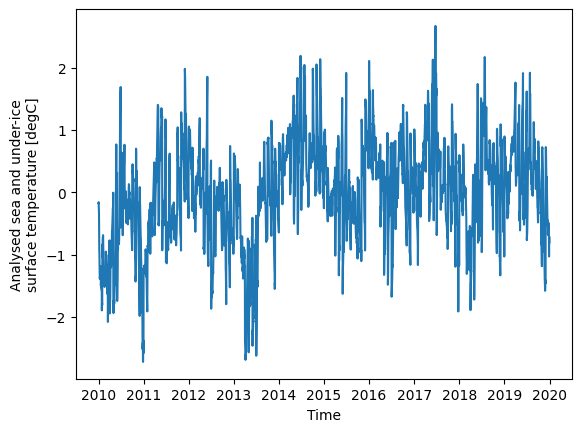

In [4]:
# Calcul de la médiane
sstMedianSeasonallyAdjusted = datasetSeasonallyAdjusted.analysed_sst.median(dim=["latitude","longitude"])

# --- Affichage de nos résultats ---
print(sstMeanSeasonallyAdjusted)
sstMeanSeasonallyAdjusted.plot()

&nbsp; 

> #### Comment interpréter nos résultats ?

Nos anomalies varient de -0.1 à -0.8°C ce qui correspond à des amplitudes réalistes pour la Manche et cohérentes avec des fluctuations interannuelles ou intra-saisonnière.

On peut remarquer que la médiane est majoritairement négative ce qui signifie que sur une grande partie des années 2010 à 2020 la température à la surface de la Manche présentaient des températures inférieures à la climatologie de référence ce qui suggère une période globalement plus froide ou une référence climatologique plus chaude que la période 2010-2020.

&nbsp; 

> #### Quel est donc le lien avec la moyenne ? 

On observe un écart d'environ -0.3°C entre les deux ce qui indique une distribution spatiale des anomalies peu asymétrique et pas de forte dominance de valeurs extrêmes. En effet la moyenne est plus sensible aux valeurs extrêmes et aux gradients locaux tandis que la médiane représente mieux la tendance centrale spatiale.

&nbsp; 

---

&nbsp;

## 3. Variance

> #### Comment calculer la variance dans notre dataset ?

La variance sert à mesurer la dispersion des valeurs autour de la moyenne, la formule de la variance spatiale dans le cas d'une sphère est :
$$
Var(t) = \frac{
\sum_{\text{lat, lon}} (T(t, \text{lat}, \text{lon}) - \bar{T}(t))^2 \cdot \cos(\text{lat})
}{
\sum_{\text{lat, lon}} \cos(\text{lat})
}
$$
où :
- $T(t, \text{lat}, \text{lon})$ est la SST d'un pixel
- $\bar{T}(t)$ est la moyenne spatiale à l'instant t
- $\cos(lat)$ pondère chaque pixel par sa surface réelle

Cette formulation est la généralisation spatiale de la variance classique.

Puisque dans notre étude nous sommes dans une zone géographique limitée et que nos données terrestres et NaN ont déjà été supprimées alors on peut simplifier la formule en :
$$
Var(t) = \frac{1}{N_{\text{pixels}}}
\sum_{\text{lat, lon}} (T(t, \text{lat}, \text{lon})-\bar{T}(t))^2
$$
Cette variance mesure donc chaque jour la variabilité spatiale de la SST dans la Manche.

&nbsp; 

>#### Pourquoi utiliser des données désaisonnalisées ?
Sur nos données désaisonnalisées la variance serait dominée par la différence de saison surtout hiver et été ainsi elle représenterait surtout l'amplitude du cycle saisonnier.
Avec nos données désaisonnalisées la variance mesure la variabilité anormale du champ de température et elle est directement liée à la dynamique interne de notre système.

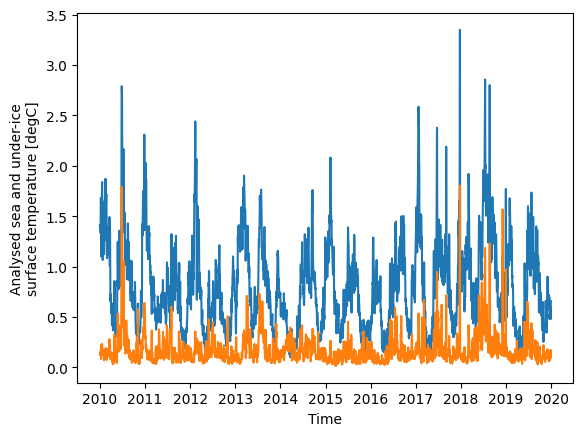

In [5]:
# Calcul de la Variance
sstVariance = dataset.analysed_sst.var(dim=["latitude", "longitude"])
sstVarianceSeasonallyAdjusted = datasetSeasonallyAdjusted.analysed_sst.var(dim=["latitude", "longitude"])

# --- Affichage de nos résultats ---
print(sstVariance)
print(sstVarianceSeasonallyAdjusted)
sstVariance.plot()
sstVarianceSeasonallyAdjusted.plot()
plt.show()


&nbsp; 

> #### Comment interpréter nos résultats ?

Pour nos données brutes, la variance représente une mesure de la dispersion spatiale des températures à la surface de la Manche pour chaque jour.
Cette variance sera influencée par le cycle saisonnier, les gradients thermiques saisonniers et la stratification estivale et le mélange hivernal (voir Compendium partie Vocabulaire).

Si notre variance est élevée cela correspondra à une forte hétérogénéité spatiale et des contrastes thermiques marqués. Si notre variance est faible cela correspondra à un champ thermique homogène (souvent observé en hiver).

Cependant les résultats de cette variance seront dominés par la saisonnalité et difficilement comparable entre périodes.

Pour nos données désaisonnalisées la variance montre les structures thermiques non saisonnières, les fronts, panaches côtiers et les évènements atypiques (anomalies chaudes ou froides localisées). Les amplitudes observées sont beaucoup plus faible et réalistes pour une mer régionale comparé aux données brutes.
Le rapport d'amplitude dont la formule est :

&nbsp; 

$$
\frac{\text{Variance brute}}{\text{Variance désaisonnalisée}} \text{ ≈ } 10
$$

&nbsp; 

Ce qui montre que la majeur partie de la visibilité spatiale de la SST est expliquée par le cycle saisonnier.

&nbsp; 

---

&nbsp;

## 4. Écart-type

>#### Calcul de l'écart-type pour la température à la surface de la Manche

L'écart-type est défini comme étant la racine carrée de la variance. Pour une étude spatiale sur une sphère la formule générale est :
$$
\sigma(t) = \sqrt{ \frac{
\sum_{\text{lat, lon}} (T(t, \text{lat}, \text{lon}) - \bar{T}(t))^2 \cdot \cos(\text{lat})
}{
\sum_{\text{lat, lon}} \cos(\text{lat})
}}
$$
avec $T$ la température désaisonnalisée, $\bar{T}$ la moyenne spatiale des anomalies et $\cos{(\text{lat})}$ la pondération surfacique.
Cependant lorsqu'on adapte la formule à notre cas, on peut simplifier l'équation en :
$$
\sigma(t) = \sqrt{ \frac{1}{N_{\text{pixels}}}
\sum_{\text{lat, lon}} (T(t, \text{lat}, \text{lon}) - \bar{T}(t))^2}
$$
Cet écart-type représente donc la variabilité spatiale des anomalies SST dans la Manche pour chaque jour, indépendamment du cycle saisonnier.

&nbsp;

> #### Pourquoi utiliser des données désaisonnalisées ?

Sur nos données brutes l'écart-type sera fortement influencé par le cycle annuel. En utilisant des données désaisonnalisées on peut mesurer uniquement la variabilité résiduelle liée aux évènements océaniques, atmosphériques ou dynamiques locales.

&nbsp;

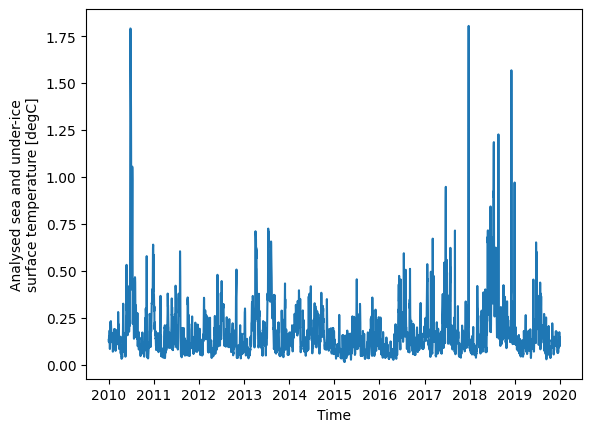

In [6]:
# Calcul de l'écart-type
sstStandardDeviationSeasonallyAdjusted = datasetSeasonallyAdjusted.analysed_sst.std(dim=["latitude","longitude"])

# --- Affichage de nos résultats ---
print(sstStandardDeviationSeasonallyAdjusted)
sstVarianceSeasonallyAdjusted.plot()
plt.show()

&nbsp;

> #### Comment interpréter nos résultats ?

On obtient des résultats de 0.30 à 0.40°C et des variations faibles ce qui signifie que pour un jour donné les anomalies de SST s'écartent en moyenne de ±0.3 à ± 0.4°C autour de la moyenne spatiale.

&nbsp;

> #### Cohérence avec la variance

Pour la variance désaisonnalisée on obtient un ordre de grandeur 0.10 à 0.15°C et puisque la formule de l'écart-type est :

$
\sigma = \sqrt{Var}
$

- $
\sqrt{0.10} \text{ ≈ } 0.32 
$

- $
\sqrt{0.15} \text{ ≈ } 0.39
$

Ce qui correspond environ à l'écart-type qu'on a trouvé.

&nbsp;

---

&nbsp;

## 5. Minimum et Maximum

> #### Comment calculer le minimum et le maximum de notre jeu de données ?

Pour un calcul de température spatiale sur une sphère, les extremes globaux sont définis par :
$$
\text{Minimum spatial : }
T_{\min}(t) = \min_{\text{lat, lon}} \left( T(t,\text{lat},\text
{lon}) \right)
$$
$$
\text{Maximum spatial : }
T_{\max}(t) = \max_{\text{lat, lon}} \left( T(t,\text{lat},\text
{lon}) \right)
$$
Ces deux valeurs représentent physiquement l'anomalie la plus froide et la plus chaude présente à la surface de la Manche quotidiennement.
Un maximum très élevé montre un réchauffement local dû aux phénomènes côtiers ou dynamiques.
Un minimum très négatif refroidissement très localisé dû à un phénomène extrême.

&nbsp;

>#### Quel est l'intérêt d'utiliser des données désaisonnalisées ?

Nos valeurs extrêmes sur le jeu de données brute correspondent presque toujours au milieu de l'hiver et au milieu de l'été ce qui empêche une interprétation physique pertinente.

En utilisant les données désaisonnalisées les minimums représentent les évènements de refroidissement anormaux et les maximums représentent les épisodes de réchauffement anormaux.

Ainsi nos extrêmes permettent d'identifier et quantifier les évènements extrêmes indépendamment du calendrier saisonnier.

<xarray.DataArray 'analysed_sst' (time: 3652)> Size: 15kB
array([5.8900146, 5.869995 , 5.6700134, ..., 8.019989 , 8.01001  ,
       7.720001 ], shape=(3652,), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 29kB 2010-01-01 2010-01-02 ... 2019-12-31
Attributes:
    units:          degC
    standard_name:  sea_surface_temperature
    long_name:      Analysed sea and under-ice surface temperature
    comment:        The under-ice SST is the freezing point temperature TS, c...
    source:         AASTI v2 SST/IST, ESA CCI SST and C3S SST L2P products
    valid_range:    [-6000  4500]
<xarray.DataArray 'analysed_sst' (time: 3652)> Size: 15kB
array([11.540009, 11.559998, 11.350006, ..., 11.799988, 11.790009,
       11.709991], shape=(3652,), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 29kB 2010-01-01 2010-01-02 ... 2019-12-31
Attributes:
    units:          degC
    standard_name:  sea_surface_temperature
    long_name:      Analysed sea and under-ice surfac

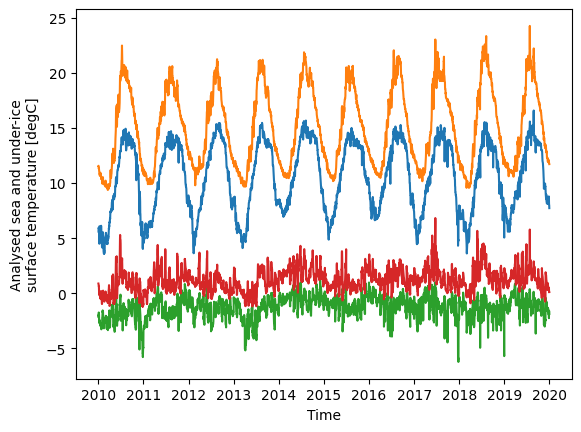

In [7]:
# Calcul du Minimum et Maximum pour nos données 
sstMin = dataset.analysed_sst.min(dim=["latitude", "longitude"])
sstMax = dataset.analysed_sst.max(dim=["latitude", "longitude"])
sstMinSeasonallyAdjusted = datasetSeasonallyAdjusted.analysed_sst.min(dim=["latitude","longitude"])
sstMaxSeasonallyAdjusted = datasetSeasonallyAdjusted.analysed_sst.max(dim=["latitude","longitude"])

# --- Affichage de nos résultats --- 
print(sstMin)
print(sstMax)
print(sstMinSeasonallyAdjusted)
print(sstMaxSeasonallyAdjusted)

# --- Tracé de la courbe --- 
sstMin.plot(label="Min")
sstMax.plot(label="Max")
sstMinSeasonallyAdjusted.plot(label="MinSaison")
sstMaxSeasonallyAdjusted.plot(label="MaxSaison")

plt.show()


> ### Comment interpréter nos résultats ?
Pour nos données brutes :

- Le minimum brut calculé est environ entre 5.7°C et 8.0°C ce qui correspond aux zones les plus froides du domaine qui sont fortement contrôlées par la saison et très peu comparable d'une année à l'autre.

- Le maximum brut est environ entre 11.3°C et 11.8°C ce qui correspond aux zones les plus chaudes qui sont directement liées à l'ensoleillement saisonnier.

Ainsi les minimums et maximums bruts sont dominés par la structure saisonnière du champ et la climatologie moyenne, ils décrivent bien l'état thermique absolu mais peu la variabilité interne.

- Pour nos données désaisonnalisées :

- Les valeurs calculées du minimum désaisonnalisé est d'environ entre -2.2°C et -1.6°C, il s'agit d'anomalies froides fortes par rapport à la climatologie saisonnière et montrent des évènements ponctuels comme un refroidissement anormal, upwelling (voir Compendium partie Vocabulaire) ou advection (voir Compendium partie Vocabulaire).

- Les valeurs calculées du maximum désaisonnalisé est d'environ entre 0.1°C et 0.9°C ce qui représente les anomalies chaudes qui sont plus modérées en comparaison aux anomalies froides.

Ainsi on observe que les anomalies froides sont plus intenses que les anomalies chaudes ce qui est physiquement cohérent en SST (mélange vertical, upwelling, refroidissement atmosphérique) (voir Compendium partie Vocabulaire).

En conclusion, le désaisonnage est essentiel pour les minimums et les maximums puisqu'en brut ils représentent les événements saisonniers attendus et en désaisonnés ils représentent les évènements extrêmes relatifs ce qui est plus pertinent pour une comparaison toute l'année.

&nbsp;

---

## 6. Quantiles

> #### Calcul des quantiles 
La formule générale des quantiles pour la géométrie spatiale d'une sphère est :
$$
Q_{\text{q}}(t) = \text{valeur de }T(t,\text{lat},\text{lon}) \text{ tel que q x 100 pourcents des pixels soient inférieurs} 
$$
Par exemple le premier quartile $Q_{\text{0.25}}(t)$ correspond à ce que 25% des pixels soient inférieur à cette valeur.

Comme pour la médiane, on applique normalement une pondération par $cos(\text{lat})$ est appliquée mais ici négligeable dû à notre zone géographique restreinte.

On peut regrouper par :
- année
- saison

&nbsp;

>#### Pourquoi utiliser des données désaisonnalisées ?
Nos données sont très marqué par le cycle annuel, grâce à la désaisonnalisation on retire ce cycle et nos anomalies sont centrées autour de 0. Cependant la répartition spatiale des pixels pour un jour ou une saison reste la même ainsi les quantiles spatiaux à l'intérieur d'une saison seront quasiment identiques puisque la désaisonnalisation affecte seulement la moyenne temporelle.

<Figure size 1200x500 with 0 Axes>

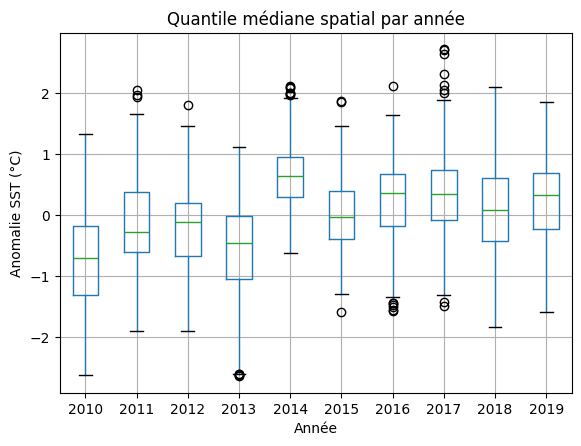

<Figure size 800x500 with 0 Axes>

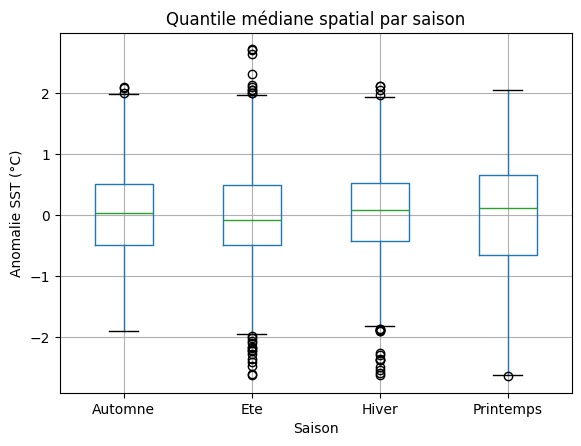

In [8]:
sst = datasetSeasonallyAdjusted.analysed_sst
quantiles = [0.25, 0.5, 0.75]
sstQuantilesDaily = sst.quantile(q=quantiles, dim=["latitude","longitude"])

# Convertir en DataFrame pour faciliter le plotting
dataframes = sstQuantilesDaily.to_dataframe().reset_index()  # colonnes : time, quantile, analysed_sst

# Ajouter des colonnes "année" et "saison" depuis time
dataframes['year'] = dataframes['time'].dt.year
dataframes['season'] = dataframes['time'].dt.month % 12 // 3 + 1 
season_labels = {1:'Hiver',2:'Printemps',3:'Ete',4:'Automne'}
dataframes['season'] = dataframes['season'].map(season_labels)

# --- Boxplot par année ---
plt.figure(figsize=(12,5))
dataframesYear = dataframes[dataframes['quantile']==0.5]  # médiane
dataframesYear.boxplot(column='analysed_sst', by='year', grid=True)
plt.title('Quantile médiane spatial par année')
plt.suptitle('')
plt.ylabel('Anomalie SST (°C)')
plt.xlabel('Année')
plt.show()

# --- Boxplot par saison ---
plt.figure(figsize=(8,5))
dataframesSeason = dataframes[dataframes['quantile']==0.5]  # médiane
dataframesSeason.boxplot(column='analysed_sst', by='season', grid=True)
plt.title('Quantile médiane spatial par saison')
plt.suptitle('')
plt.ylabel('Anomalie SST (°C)')
plt.xlabel('Saison')
plt.show()


&nbsp;

> #### Comment interpréter nos résultats ?
Pour les quantiles par années :
- Chaque jour appartient à une année en calculant les quantiles on peut ainsi suivre l'évolution annuelle de la médiane et la dispersion et détecter les années avec des anomalies globales.
- Certaines années sont globalement plus froide (2010,2011,2013) avec une médiane négative et d'autres plus chaudes (2014,2016,2019) avec une médiane positive.

&nbsp;

Pour les quantiles par saisons :
- Les quantiles saisonniers montrent la variabilité typique pour chaque saison indépendamment de la saisonnalité moyenne. Avec nos données désaisonnalisées les extrêmes représentent des anomalies spatiales et la comparaison saisonnière est pertinente par exemple l'hiver 2011 avait des anomalies froides plus importantes que l'hiver 2015.
